# Modularity and Community Detection

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import community # --> http://perso.crans.org/aynaud/communities/
import networkx as nx
import numpy as np
from igraph import *



In [49]:
g = nx.full_rary_tree(3, 6)
g = nx.karate_club_graph()
N = g.number_of_nodes()
partition = community.best_partition(g)

# nx.draw(g)
print "Louvain Modularity: ", community.modularity(partition, g)
print "Louvain Partition:  ", partition.values()

Louvain Modularity:  0.418803418803
Louvain Partition:   [0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2]


In [50]:
edges = g.edges()
g = Graph(edges=edges, directed=False)
cl = g.community_fastgreedy()
k=2
cl.as_clustering(k).membership

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

## Finding the Best Number of Partitions

- Community Fast Greedy
  This is a method from igraph and here is how it works.


## Another approach to finding community

In [51]:
# Create the graph
vertices = [i for i in range(N)]
# edges = [(0,2),(0,1),(0,3),(1,0),(1,2),(1,3),(2,0),(2,1),(2,3),(3,0),(3,1),(3,2),(2,4),(4,5),(4,6),(5,4),(5,6),(6,4),(6,5)]

g = Graph(vertex_attrs={"label":vertices}, edges=edges, directed=False)

In [52]:
visual_style = {}

# Scale vertices based on degree
outdegree = g.outdegree()
visual_style["vertex_size"] = [x/max(outdegree)*20+10 for x in outdegree]

# # Set bbox and margin
visual_style["bbox"] = (800,800)
visual_style["margin"] = 100


In [53]:
# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Order vertices in bins based on outdegree
bins = np.linspace(0, max(outdegree), len(colours))
digitized_degrees =  np.digitize(outdegree, bins)

# Set colors according to bins
g.vs["color"] = [colours[x-1] for x in digitized_degrees]

# Also color the edges
for ind, color in enumerate(g.vs["color"]):
        edges = g.es.select(_source=ind)
        edges["color"] = [color]

# Don't curve the edges
visual_style["edge_curved"] = False
visual_style["vertex_label_size"] = 4

{'layout': <Layout with 34 vertices and 2 dimensions>, 'vertex_label_size': 3, 'edge_curved': False, 'bbox': (800, 800), 'margin': 100, 'vertex_size': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 30]}


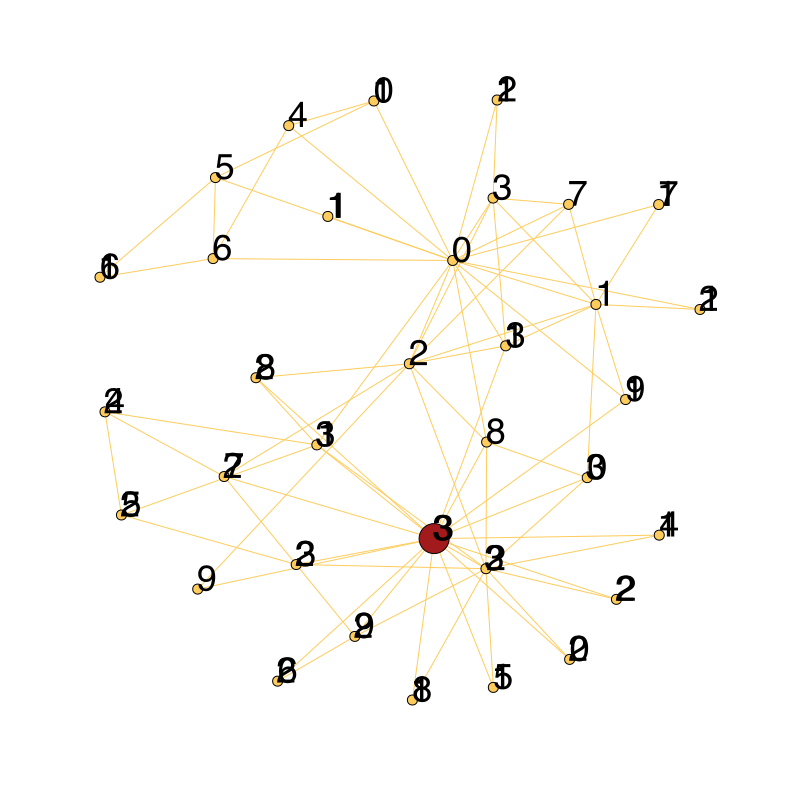

In [55]:
# Community detection
communities = g.community_edge_betweenness(directed=True)
clusters = communities.as_clustering()

# Set edge weights based on communities
weights = {v: len(c) for c in clusters for v in c}
g.es["weight"] = [weights[e.tuple[0]] + weights[e.tuple[1]] for e in g.es]

# Choose the layout
N = len(vertices)
visual_style["layout"] = g.layout_fruchterman_reingold(weights=g.es["weight"], maxiter=1000, area=N**3, repulserad=N**3)

# Plot the graph
print visual_style
plot(g, **visual_style)

## A different framework to do the same 
[V.A. Traag](http://www.traag.net/2013/10/25/easy-flexible-framework-for-community-detection/#zp-ID-163-1383957-EPZH5I7G) posted a new framework in 2013


In [4]:
import igraph as ig
import louvain as louvain
G = ig.Graph.Tree(n=100, children=3);
opt = louvain.Optimiser();
partition = opt.find_partition(graph=G,
    partition_class=louvain.SignificanceVertexPartition);

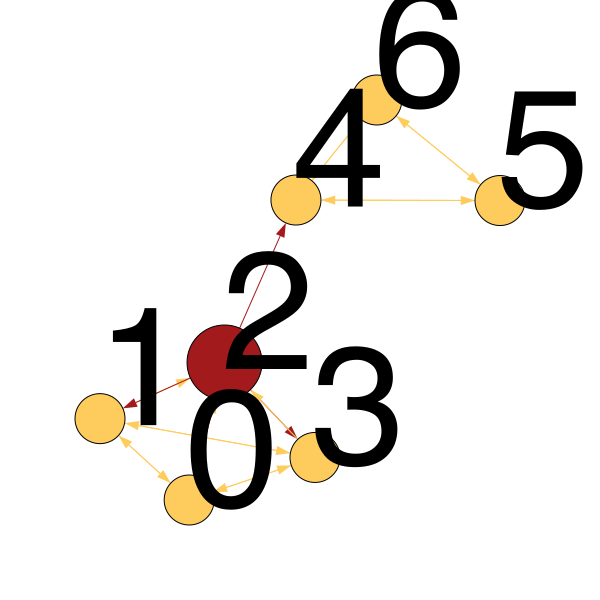

In [6]:
from igraph import *
import numpy as np

vertices = [i for i in range(7)]
edges = [(0,2),(0,1),(0,3),(1,0),(1,2),(1,3),(2,0),(2,1),(2,3),(3,0),(3,1),(3,2),(2,4),(4,5),(4,6),(5,4),(5,6),(6,4),(6,5)]

g = Graph(vertex_attrs={"label":vertices}, edges=edges, directed=True)

visual_style = {}

# Scale vertices based on degree
outdegree = g.outdegree()
visual_style["vertex_size"] = [x/max(outdegree)*25+50 for x in outdegree]

# Set bbox and margin
visual_style["bbox"] = (600,600)
visual_style["margin"] = 100

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Order vertices in bins based on outdegree
bins = np.linspace(0, max(outdegree), len(colours))  
digitized_degrees =  np.digitize(outdegree, bins)

# Set colors according to bins
g.vs["color"] = [colours[x-1] for x in digitized_degrees]

# Also color the edges
for ind, color in enumerate(g.vs["color"]):
        edges = g.es.select(_source=ind)
        edges["color"] = [color]
        
# Don't curve the edges
visual_style["edge_curved"] = False

# Community detection
communities = g.community_edge_betweenness(directed=True)
clusters = communities.as_clustering()

# Set edge weights based on communities
weights = {v: len(c) for c in clusters for v in c}
g.es["weight"] = [weights[e.tuple[0]] + weights[e.tuple[1]] for e in g.es]

# Choose the layout
N = len(vertices)
visual_style["layout"] = g.layout_fruchterman_reingold(weights=g.es["weight"], maxiter=1000, area=N**3, repulserad=N**3)
        
# Plot the graph
plot(g, **visual_style)